# Web Scraping & NLP in Python

This is a sample Web Scraping Problem where I will scrape novels from the web and plot word frequency distributions.  This analysis will utilize the following steps:

1. Stating the question.
2. Getting the data.
3. Wrangling the data to answer the question.
4. Answer the question.
5. Present the solution so that others can understand it.

### I. Stating the question

What are the most frequent words in the novel *Moby Dick* and how often do they occur?

In [4]:
# Storing the URL where Moby Dick is stored.

url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

### II.  Getting the Data

In [6]:
# Import `requests`
import requests

# making the request from the URL
r = requests.get(url)

# Identifying the object type
type(r)

requests.models.Response

In [8]:
# Extracting HTML from Response object and print

html = r.text

In [10]:
# Printing out the html.

#print(html)

### III. Wrangling the Data to answer the question

**Part 1:** Get the text from the HTML

In [12]:
# Importing BeautifulSoup for web scraping
from bs4 import BeautifulSoup


In [14]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")

# Identifying the BeautifulSoup type
type(soup)


bs4.BeautifulSoup

In [16]:
# Getting the soup title with HTML tags
soup.title


<title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>

In [18]:
# Getting the soup title as a string
soup.title.string


'\n      Moby Dick; Or the Whale, by Herman Melville\n    '

In [21]:
# Getting all the hyperlinks from soup
soup.findAll('a')[:10]


[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>,
 <a href="#link2HCH0006"> CHAPTER 6. The Street. </a>,
 <a href="#link2HCH0007"> CHAPTER 7. The Chapel. </a>,
 <a href="#link2HCH0008"> CHAPTER 8. The Pulpit. </a>]

In [23]:
# Getting the text out of the soup and printing it.
text = soup.get_text()

type(text)

str

In [26]:
# Executing the code below displays the entire text of Moby Dick.

#print(text)

**Part 2:** Extract Words from text with NLP 

In [29]:
# Import regex package
import re

# Define sentence
sentence = 'peter piper pick a peck of pickled peppers'

# Define regex.  This matches words begining with the letter P.
ps = 'p\w+'


In [31]:
# Finding all the words in the sentence that match the regex
re.findall(ps, sentence)


['peter', 'piper', 'pick', 'peck', 'pickled', 'peppers']

In [35]:
# Step 1: Tokenize

# Finding all the words in Moby Dick
tokens = re.findall('\w+', text)

# Printing out the first 10 words
tokens[:10]


['ï', 'Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville', 'body']

In [39]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Creating the tokenizer
tokenizer = RegexpTokenizer('\w+')

# Creating tokens
tokens = tokenizer.tokenize(text)

# Printing the first few tokens
tokens[:10]

['ï', 'Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville', 'body']

In [41]:
# Initializing a new list
words = []

# Looping through list tokens and making them lower case
for word in tokens:
    words.append(word.lower())
    
# Printing several items from list as a sanity check
words[:10]


['ï', 'moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville', 'body']

In [43]:
# Step 2:  Removing stop words

# Importing nltk
import nltk

# Getting the English stopwords and printing some of them
sw = nltk.corpus.stopwords.words('english')

# Listing out the first 10 stop words
sw[:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [46]:
# Initializing new list 
words_ns = []

# Adding to words_ns all the words that are in 'words' but not in 'sw'
for word in words:
    if word not in sw:
        words_ns.append(word)
        
# Printing several list items as a sanity check
words_ns[:10]

['ï',
 'moby',
 'dick',
 'whale',
 'herman',
 'melville',
 'body',
 'background',
 'faebd0',
 'color']

### IV. Answering the question

The question was 'What are the most frequent words in the novel *Moby Dick* and how often they occur?

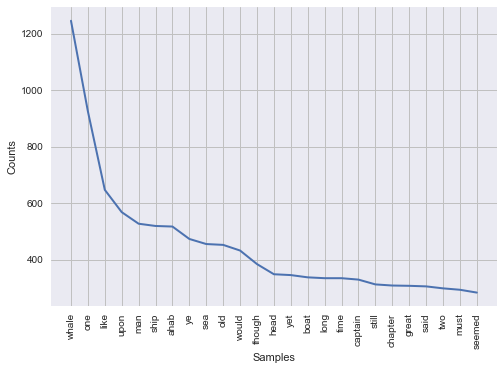

In [49]:
# Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline

sns.set()

# Creating a frequency distribution and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

### V. Presenting the solution so that others can understanding it.

In the novel *Moby Dick*, the most common word is the word whale which occurs in excess of 1,200 times. 

### Creating a function to facilitate the whole process

In [59]:
def plot_word_freq(url):
    '''Takes a url (from Project Gutenberg) and plots a word frequency distribution graph'''
    
    # Makes the request and checks object type
    r = requests.get(url)
    
    # Extracts HTML from Response object and print
    html = r.text
    
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, 'html5lib')
    
    # Get the text out of 'soup'
    text = soup.get_text()
    
    # Creation of the tokenizer
    tokenizer = RegexpTokenizer('\w+')
    
    # Creating tokens
    tokens = tokenizer.tokenize(text)
    
    # Initializing a new list
    words = []
    
    # Loop through list tokens and make them lower case
    for word in tokens:
        words.append(word.lower())
        
    # Get English stopwords and printing some of them
    sw = nltk.corpus.stopwords.words('english')
    
    # Initializing a new list
    words_ns = []
    
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
            
    # Creating the frequency distribution and plot
    freqdist1 = nltk.FreqDist(words_ns)
    
    freqdist1.plot(25)

### Word Frequency in the novel *Pride and Prejudice*

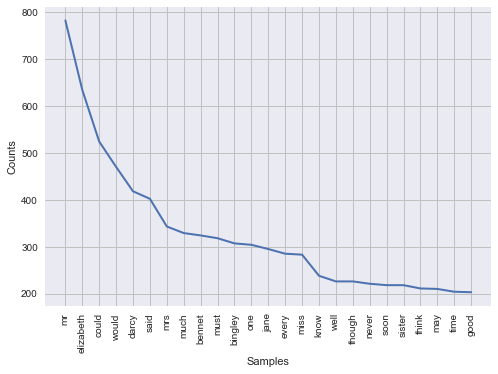

In [65]:
# Pride and prejudice
pride_and_prejudice = 'https://www.gutenberg.org/files/42671/42671-h/42671-h.htm'

plot_word_freq(pride_and_prejudice)

### Word Frequency in the novel *Robinson Crusoe*

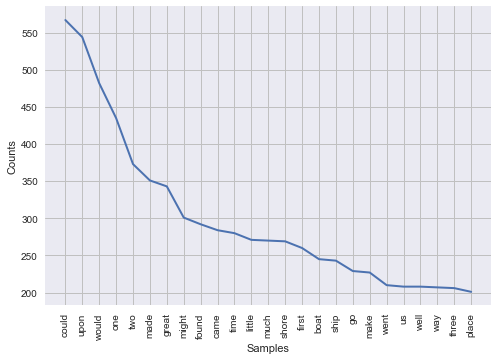

In [66]:
# Robinson Crusoe
robinson_crusoe = 'https://www.gutenberg.org/files/521/521-h/521-h.htm'

plot_word_freq(robinson_crusoe)

### Word Frequency in the *King James Bible*

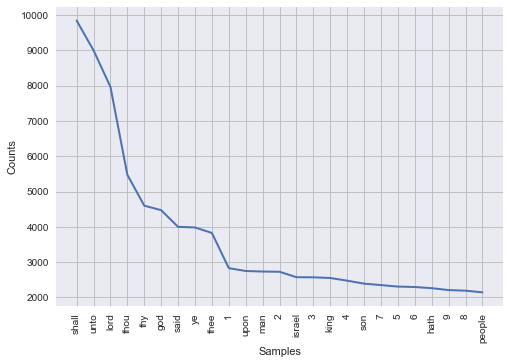

In [64]:
# The King James Bible
king_james_bible = 'https://www.gutenberg.org/files/10/10-h/10-h.htm'

plot_word_freq(king_james_bible)